# Brief introduction to python iGraph library

![igraph python](https://images.unsplash.com/photo-1566443280617-35db331c54fb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)


photo by [Omar Flores](https://unsplash.com/@__itsflores) at [Unsplash](https://unsplash.com/)


## Introduction

this is a very quick introduction about how to use python igraph library

In [ ]:
#import
import numpy as np
import pandas as pd

In [ ]:
!pip install igraph
!apt install libcairo2-dev
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 12.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bio

In [ ]:
from igraph import *
#print(igraph.__version__)

In [ ]:
#creating a graph from scratch
g = Graph()
#add vertices
g.add_vertices(3)
#add egdges
g.add_edges([(0,1), (1,2)])
#check the graph
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [ ]:
#generate a tree
#Graph.Tree() generates a regular tree graph
#each node has two childreen
g = Graph.Tree(22, 2)
summary(g)

IGRAPH U--- 22 21 -- 


In [ ]:
#the list of edges
g.get_edgelist()[0:10]

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

In [ ]:
#assign attribute to a graph
g["name"] = "social network"
# node and edges attributes
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
#node attributes
g.vs
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
#edges attribute
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]
#print attributes for a edge
g.es[0].attributes()

{'is_formal': False}

In [ ]:
#node and edge attributes are modifiable
g.es[0]["is_formal"] = True
g.es[0].attributes()

{'is_formal': True}

In [ ]:
#structural properties
#node degrees
print(g.degree())
#for a node
print(g.degree(6))
#for a list of node
g.degree([2,3,4])

[3, 1, 4, 3, 2, 3, 2]
2


[4, 3, 2]

In [ ]:
#betweness centrality
g.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [ ]:
#node selection
g.vs.select(_degree=g.maxdegree())["name"]
claire = g.vs.find(name="Claire")
claire.index

2

In [ ]:
#get adjacency matrix
A = g.get_adjacency()
print(A)

[[0, 1, 1, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 1, 1, 0]
 [0, 0, 1, 0, 1, 0, 1]
 [0, 0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 1, 0, 1, 0]]


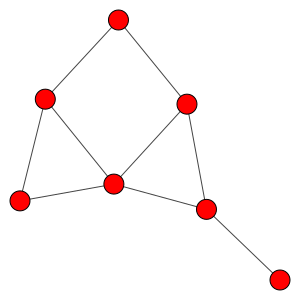

In [ ]:
#plot with different layaout
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")
plot(g, layout=layout, bbox=(300, 300))

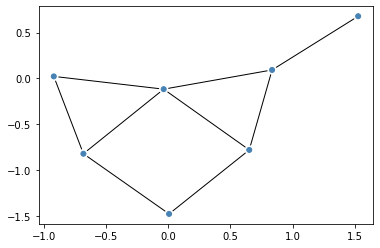

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot(g, layout=layout, target=ax)

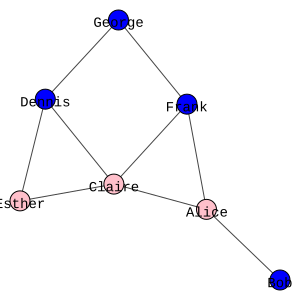

In [ ]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
plot(g, layout=layout, bbox=(300, 300), margin=20)

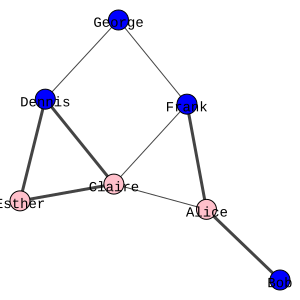

In [ ]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
plot(g, **visual_style)